In [3]:
import pandas as pd
import numpy as np
from watertap3.utils import watertap_setup, get_case_study, run_model 
from watertap3.utils import run_watertap3, run_model_no_print, run_and_return_model
import pyomo.util.infeasible as infeas
from idaes.core.util.model_statistics import *
import matplotlib.pyplot as plt
from truck_pipe_cost_functions import truck_costing, pipe_costing
from watertap3.utils.post_processing import get_results_table

In [4]:
# Antiscalant dosing LCOW - KBHDP was running into issues so just moved to Big spring

case_study = 'big_spring'
scenario = 'well_cluster'
desired_recovery = 1
ro_bounds = 'other' # or 'seawater'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.big_spring_feed.flow_vol_in.fix()
m.fs.big_spring_feed.conc_mass_in[0, 'tds'].fix()
m = run_and_return_model(m, objective=True,print_it=True)



Case Study = BIG SPRING
Scenario = WELL CLUSTER


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
ANTI SCALANT ADDITION TRANSPORT
USE
WASTE


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 0

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 0

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

BIG SPRING: WELL CLUSTER
=========================SYSTEM LEVEL RESULTS=========================
LCOW ($/m3): 0.0452
Total Capital Investment ($MM): 0.906
Total Annual Operating Costs ($MM/yr): 0.048
Annual Fixed Operating Cost ($MM/yr): 0.012
Annual Catalysts and Chemicals Cost ($MM/yr): 0.036
Annual Electricity Costs ($MM/yr): 0.0
Annual Other Variable Costs ($MM/yr): 0.0
Treated water (m3/s): 0.075
Total water recovery (%): 99.97
Electricity 

In [34]:
# Baseline - Checking if it matches the results in previous study. It does!

case_study = 'kbhdp'
scenario = 'baseline'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(0.031541)
m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix(16.96) #kg/m3
m.fs.deep_well_injection.lift_height.fix(2720)

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = BASELINE


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = BASELINE


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING

............

In [9]:
m.fs.deep_well_injection.pipe_distance

0

1. Get LCOW for each treatment train

In [3]:
# Deep well injection

case_study = 'kbhdp'
scenario = 'dwi'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(1.25)
# m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix() #kg/m3
m.fs.deep_well_injection.lift_height.fix(2500)

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WEL

In [12]:
m.fs.deep_well_injection.pipe_fixed_cap_cost

0.0

In [14]:
# Evaporations ponds

case_study = 'kbhdp'
scenario = 'zld_a'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(1.25)  #gpm to m3s
m.fs.evaporation_pond.water_recovery.fix(0.95)
# m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix() #kg/m3

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())


Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
EVAPORATION POND
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED ST

In [15]:
# Checking if the landfill costs make sense
print('Wet solids flow rate:',m.fs.landfill_zld.wet_solids_flow_rate())  # in MT/day
print('Required area:', m.fs.landfill_zld.required_area())

Wet solids flow rate: 597.5665116683371
Required area: 179.26995350050112


In [16]:
# Brine concentrator and crystallizer

case_study = 'kbhdp'
scenario = 'zld_c'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

m.fs.kbhdp_brackish_ave.flow_vol_in.fix(1.25)  #gpm to m3s
# m.fs.kbhdp_brackish_ave.conc_mass_in[0, 'tds'].fix() #kg/m3

m.fs.costing_param.electricity_price = 0.0652
m = run_and_return_model(m, objective=True,print_it=True)
m, df = get_results_table(m=m, case_study='test', scenario=scenario)    
print('LCOW:', m.fs.costing.LCOW.value())
print('System recovery:',m.fs.costing.system_recovery())
print('Calculated recovery:', 1-m.fs.landfill_zld.flow_vol_in[0].value/1.25)


Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
BRINE CONCENTRATOR
CRYSTALLIZER
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINA

In [17]:
# Checking if the landfill costs make sense
print('Wet solids flow rate:',m.fs.landfill_zld.wet_solids_flow_rate())  # in MT/day
print('Required area:', m.fs.landfill_zld.required_area())

Wet solids flow rate: 228.42831539249758
Required area: 68.52849461774927


In [18]:
flow_in = 1.33628
caustic_bypass = 0.393*flow_in
ro_stage_1 = 0.51078
ro_stage_2 = 0.16218
bc = 0.12548
crs = 0.01325

0.9999*0.9999*(caustic_bypass+ro_stage_1+ro_stage_2)

1.1978784283731805

Sensitivity analysis

In [15]:
flow_list = [0.5,0.75,1.0,1.25] #m3/s

In [16]:
# Deep well injection

case_study = 'kbhdp'
scenario = 'dwi'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

lcow_dwi =  np.array([])

for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_dwi = np.concatenate((lcow_dwi,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
dwi_conc_flow = m.fs.deep_well_injection.flow_vol_in[0].value
dwi_recovery = m.fs.costing.system_recovery()


Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
ANTI SCALANT ADDITION TRANSPORT
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
DEEP WELL INJECTION
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = DWI


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
ANTI SCALANT ADDITION TRANSPORT
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND S

In [72]:
# Evaporation pond
# flow_list = [0.5,1.5,2.25,4.5] #m3/s

case_study = 'kbhdp'
scenario = 'zld_a'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

lcow_evap_pond =  np.array([])
for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m.fs.evaporation_pond.water_recovery.fix(0.98)
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_evap_pond = np.concatenate((lcow_evap_pond,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
evap_pond_conc_flow = m.fs.evaporation_pond.flow_vol_in[0].value
zld_a_landfill_conc_flow = m.fs.landfill_zld.flow_vol_in[0].value

evap_recovery = m.fs.costing.system_recovery()
print('WT3 recovery:',evap_recovery)
print('Calculated recovery:', 1-m.fs.evaporation_pond.flow_vol_in[0].value/flow)


Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
EVAPORATION POND
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD A


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED ST

In [22]:
# Brine concentrator and crystallizer
# flow_list = [0.5,1.5,2.25,4.5] #m3/s

case_study = 'kbhdp'
scenario = 'zld_c'
desired_recovery = 1
ro_bounds = 'other'

m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)
m = run_watertap3(m, desired_recovery=desired_recovery, ro_bounds=ro_bounds)

m.fs.ro_first_stage.membrane_area.unfix()
m.fs.ro_second_stage.membrane_area.unfix()
# m.fs.ro_first_stage.feed.pressure.unfix()
# m.fs.ro_second_stage.feed.pressure.unfix()

lcow_brine_cryst =  np.array([])
for flow in flow_list:
    m.fs.kbhdp_brackish_ave.flow_vol_in.fix(flow) 
    m = run_and_return_model(m, objective=True,print_it=True)
    lcow_brine_cryst = np.concatenate((lcow_brine_cryst,[m.fs.costing.LCOW.value()]))
    
m, df = get_results_table(m=m, case_study='high_flow', scenario=scenario)    
zld_c_landfill_conc_flow = m.fs.landfill_zld.flow_vol_in[0].value
zld_c_recovery = m.fs.costing.system_recovery()
print('WT3 recovery:',zld_c_recovery )
print('Calculated recovery:', 1-m.fs.landfill_zld.flow_vol_in[0].value/flow)


Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINATION
TREATED STORAGE
BRINE CONCENTRATOR
CRYSTALLIZER
LANDFILL ZLD
MUNICIPAL DRINKING


=========================START WT3 MODEL RUN==========================
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................
.................................

Degrees of Freedom: 4

Initial solve attempt OPTIMAL

WaterTAP3 solution OPTIMAL

.................................

Case Study = KBHDP
Scenario = ZLD C


=========================ADDING UNIT PROCESSES=========================
WELL FIELD
MEDIA FILTRATION
CARTRIDGE FILTRATION
ANTI SCALANT ADDITION
RO FIRST STAGE
PASSTHROUGH
LIME SOFTENING
RO SECOND STAGE
CAUSTIC SODA ADDITION
CHLORINA

In [17]:
print(dwi_conc_flow)
print(evap_pond_conc_flow)
print(zld_c_landfill_conc_flow)

0.12651166200224293


NameError: name 'evap_pond_conc_flow' is not defined

In [18]:
print(dwi_recovery)
print(evap_recovery)
print(zld_c_recovery)

0.8993451275773519


NameError: name 'evap_recovery' is not defined

In [25]:
distances = [0,10,20,50,100] # in km

In [65]:
# Deep well injection
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_dwi.csv')
units = df['Unit Process Name'].unique() 

data_dwi= pd.DataFrame( columns = units[1::])
pipe_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,13))

    temp = pd.DataFrame(new_row , columns = units[1::],index = ['dwi'] )
    data_dwi= pd.concat([data_dwi,temp])
    dwi_conc_flow = df[(df['Unit Process Name']== 'Deep Well Injection') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    dwi_recovery = df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100
    # Pipe cost was first calculated based on brine volume and then corrected to feed volume basis 
    pipe_cost_list.append(pipe_costing(dwi_conc_flow*3600*24,d)*(1-dwi_recovery)/dwi_recovery)
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_dwi.reset_index(inplace=True)
data_dwi.insert(loc=1,column='Recovery',value=recovery_list)
data_dwi.insert(loc=2,column='Distance',value=distances)
data_dwi['Pipe Cost'] = pipe_cost_list
data_dwi['lcow'] = data_dwi.iloc[:,3:-2].sum(axis=1)
data_dwi['tlcow'] = data_dwi['Pipe Cost'] + data_dwi['lcow']
data_dwi = data_dwi.rename(columns={'index':'scenario'})
# print(pipe_cost_list)
data_dwi

,scenario,Recovery,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,Passthrough,Lime Softening,RO Second Stage,Caustic Soda Addition,Chlorination,Treated Storage,Deep Well Injection,Municipal Drinking,Pipe Cost,lcow,tlcow
0,dwi,0.899437,0,0.025978,0.016524,0.009746,0.017355,0.184763,0.0,0.085799,0.027881,0.007866,0.02083,0.030151,0.058234,0.022038,0.000000,0.485125,0.485125
1,dwi,0.899437,10,0.025978,0.016524,0.009746,0.017355,0.184763,0.0,0.085799,0.027881,0.007866,0.02083,0.030151,0.058234,0.022038,0.022985,0.485125,0.508111
2,dwi,0.899437,20,0.025978,0.016524,0.009746,0.017355,0.184763,0.0,0.085799,0.027881,0.007866,0.02083,0.030151,0.058234,0.022038,0.030073,0.485125,0.515199
3,dwi,0.899437,50,0.025978,0.016524,0.009746,0.017355,0.184763,0.0,0.085799,0.027881,0.007866,0.02083,0.030151,0.058234,0.022038,0.050927,0.485125,0.536052
4,dwi,0.899437,100,0.025978,0.016524,0.009746,0.017355,0.184763,0.0,0.085799,0.027881,0.007866,0.02083,0.030151,0.058234,0.022038,0.085547,0.485125,0.570672


In [69]:
# Evaporation pond
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_zld_a.csv')
units = df['Unit Process Name'].unique() 

data_zld_a= pd.DataFrame(columns =  units[1::])
pipe_cost_list = []
truck_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,14))
    temp = pd.DataFrame(new_row , columns = units[1::],index = ['zld_a'] )
    data_zld_a= pd.concat([data_zld_a,temp])
    evap_pond_conc_flow = df[(df['Unit Process Name']== 'Evaporation Pond') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    zld_a_landfill_conc_flow = df[(df['Unit Process Name']== 'Landfill ZLD') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    evap_recovery = df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100
    # Pipe cost was first calculated based on brine volume and then corrected to feed volume basis 
    pipe_cost_list.append(pipe_costing(evap_pond_conc_flow*3600*24,d)*(1-evap_recovery)/evap_recovery)
    #Truck cost is corrected to feed volume basis
    truck_cost_list.append(truck_costing(d)*zld_a_landfill_conc_flow/flow_list[-1])
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_zld_a.reset_index(inplace=True)
data_zld_a.insert(loc=1,column='Recovery',value=recovery_list)
data_zld_a.insert(loc=2,column='Evap Conc Flow',value=evap_pond_conc_flow)
data_zld_a.insert(loc=3,column='Landfill Conc Flow',value=zld_a_landfill_conc_flow)
data_zld_a.insert(loc=4,column='Distance',value=distances)
data_zld_a['Pipe Cost'] = pipe_cost_list
data_zld_a['Truck Cost'] = truck_cost_list
data_zld_a['lcow'] = data_zld_a.iloc[:,5:-3].sum(axis=1)
data_zld_a['tlcow'] = data_zld_a['Pipe Cost'] + data_zld_a['Truck Cost']+data_zld_a['lcow']
data_zld_a = data_zld_a.rename(columns={'index':'scenario'})

data_zld_a

,scenario,Recovery,Evap Conc Flow,Landfill Conc Flow,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,...,Caustic Soda Addition,Chlorination,Treated Storage,Evaporation Pond,Landfill ZLD,Municipal Drinking,Pipe Cost,Truck Cost,lcow,tlcow
0,zld_a,0.916557,0.105167,0.002103,0,0.025493,0.016215,0.009564,0.017031,0.177201,...,0.007844,0.020608,0.029992,0.055209,0.087438,0.022024,0.000000,0.000000,0.585601,0.585601
1,zld_a,0.916557,0.105167,0.002103,10,0.025493,0.016215,0.009564,0.017031,0.177201,...,0.007844,0.020608,0.029992,0.055209,0.087438,0.022024,0.021053,0.004096,0.585601,0.610750
2,zld_a,0.916557,0.105167,0.002103,20,0.025493,0.016215,0.009564,0.017031,0.177201,...,0.007844,0.020608,0.029992,0.055209,0.087438,0.022024,0.027242,0.004658,0.585601,0.617500
3,zld_a,0.916557,0.105167,0.002103,50,0.025493,0.016215,0.009564,0.017031,0.177201,...,0.007844,0.020608,0.029992,0.055209,0.087438,0.022024,0.045405,0.006345,0.585601,0.637350
4,zld_a,0.916557,0.105167,0.002103,100,0.025493,0.016215,0.009564,0.017031,0.177201,...,0.007844,0.020608,0.029992,0.055209,0.087438,0.022024,0.075945,0.009156,0.585601,0.670702


In [70]:
# Brine concentrator and crystallizer
# Getting each unit process for treatment train
df = pd.read_csv('/Users/mhardika/Documents/watertap3/WaterTAP3/watertap3/watertap3/results/case_studies/high_flow_zld_c.csv')
units = df['Unit Process Name'].unique() 

data_zld_c= pd.DataFrame( columns = units[1::])
truck_cost_list = []
recovery_list =[]

for d in distances:
    new_row = np.array([df[(df['Variable'] == 'Unit LCOW') ]['Value'].values])
    new_row = new_row.reshape((1,15))
    temp = pd.DataFrame(new_row , columns = units[1::],index = ['zld_c'] )
    data_zld_c= pd.concat([data_zld_c,temp])
    #Truck cost is corrected to feed volume basis
    zld_c_landfill_conc_flow =  df[(df['Unit Process Name']== 'Landfill ZLD') & (df['Variable']== 'Inlet Water Flow')]['Value'].values[0]
    truck_cost_list.append(truck_costing(d)*(zld_c_landfill_conc_flow/flow_list[-1]))
    recovery_list.append(df[(df['Unit Process Name']== 'System') & (df['Variable']== 'Water Recovery')]['Value'].values[0]/100)

data_zld_c.reset_index(inplace=True)
data_zld_c.insert(loc=1,column='Recovery',value=recovery_list)
data_zld_c.insert(loc=2,column='Conc Flow',value=zld_c_landfill_conc_flow)
data_zld_c.insert(loc=3,column='Distance',value=distances)
data_zld_c['Truck Cost'] = truck_cost_list
data_zld_c['lcow'] = data_zld_c.iloc[:,4:-2].sum(axis=1)
data_zld_c['tlcow'] = data_zld_c['Truck Cost']+data_zld_c['lcow']
data_zld_c = data_zld_c.rename(columns={'index':'scenario'})

data_zld_c

,scenario,Recovery,Conc Flow,Distance,Well Field,Media Filtration,Cartridge Filtration,Anti-Scalant Addition,RO First Stage,Passthrough,...,Caustic Soda Addition,Chlorination,Treated Storage,Brine Concentrator,Crystallizer,Landfill ZLD,Municipal Drinking,Truck Cost,lcow,tlcow
0,zld_c,1.000279,0.000497,0,0.023359,0.014858,0.008763,0.015606,0.15525,0.0,...,0.007219,0.018925,0.02927,0.172445,0.078036,0.035169,0.021963,0.000000,0.704249,0.704249
1,zld_c,1.000279,0.000497,10,0.023359,0.014858,0.008763,0.015606,0.15525,0.0,...,0.007219,0.018925,0.02927,0.172445,0.078036,0.035169,0.021963,0.000967,0.704249,0.705216
2,zld_c,1.000279,0.000497,20,0.023359,0.014858,0.008763,0.015606,0.15525,0.0,...,0.007219,0.018925,0.02927,0.172445,0.078036,0.035169,0.021963,0.001100,0.704249,0.705348
3,zld_c,1.000279,0.000497,50,0.023359,0.014858,0.008763,0.015606,0.15525,0.0,...,0.007219,0.018925,0.02927,0.172445,0.078036,0.035169,0.021963,0.001498,0.704249,0.705747
4,zld_c,1.000279,0.000497,100,0.023359,0.014858,0.008763,0.015606,0.15525,0.0,...,0.007219,0.018925,0.02927,0.172445,0.078036,0.035169,0.021963,0.002162,0.704249,0.706410


Plot sensitivity results

Text(0.5, 1.0, 'Deep Well Injection')

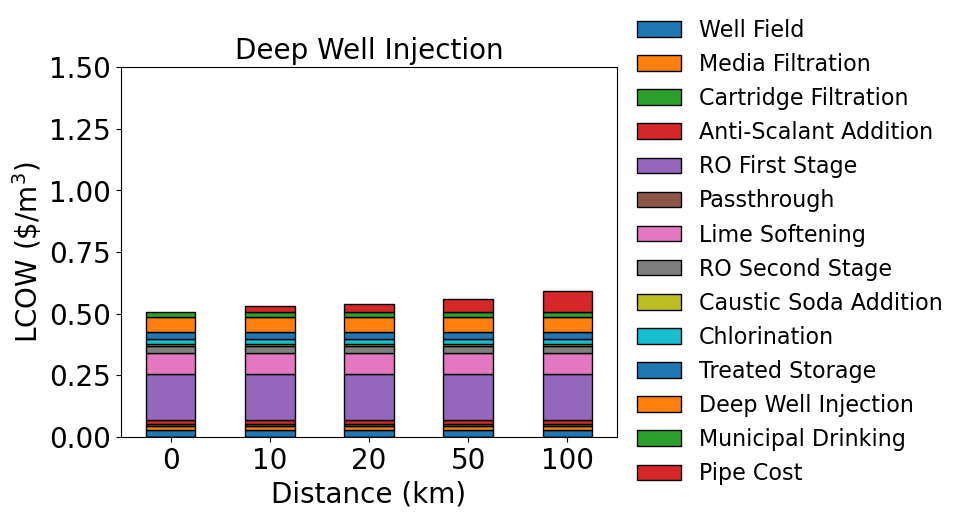

<Figure size 1000x700 with 0 Axes>

In [29]:
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_dwi.iloc[:,2::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Deep Well Injection',fontsize =20)

Text(0.5, 1.0, 'Evaporation Pond')

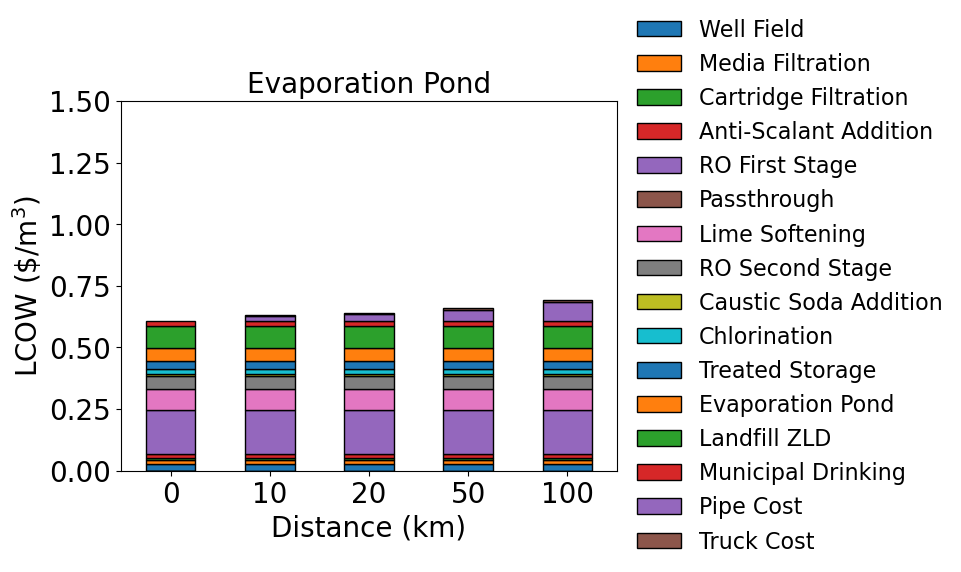

<Figure size 1000x700 with 0 Axes>

In [41]:
# Evaporation Pond
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_zld_a.iloc[:,4::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Evaporation Pond',fontsize =20)

Text(0.5, 1.0, 'Brine concentrator and crystallizer')

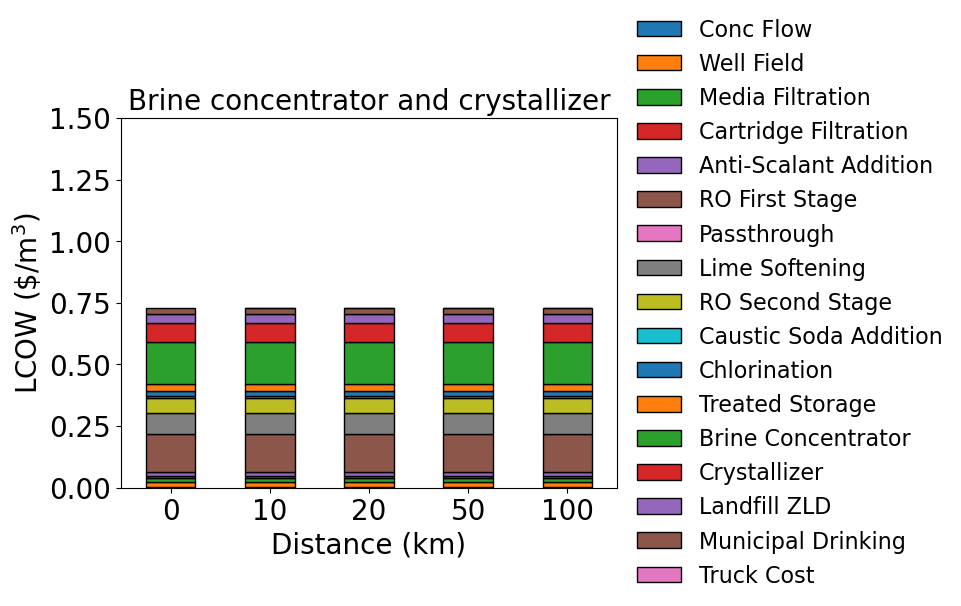

<Figure size 1000x700 with 0 Axes>

In [38]:
# Brine concentrator and crystallizer
colors = plt.cm.GnBu(np.linspace(0, 1, 15))
ax = data_zld_c.iloc[:,2::].plot.bar(x='Distance',stacked = True, edgecolor = 'black') #color=
plt.figure(figsize=(10,7))
ax.set_ylim([0,1.5])
ax.set_xticklabels([0,10,20,50,100], rotation = 0,fontsize =14)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('Distance (km)',fontsize =20)
ax.set_ylabel(r'LCOW (\$/m${^3}$)',fontsize =20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=16,frameon=False)
ax.set_title('Brine concentrator and crystallizer',fontsize =20)